#Aula

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
path = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'

dados = pd.read_csv(path, compression='zip')
dados

id    tratamento  tempo dose  ...    c-96    c-97    c-98    c-99
0      id_000644bb2     com_droga     24   D1  ... -0.3981  0.2139  0.3801  0.4176
1      id_000779bfc     com_droga     72   D1  ...  0.1522  0.1241  0.6077  0.7371
2      id_000a6266a     com_droga     48   D1  ... -0.6417 -0.2187 -1.4080  0.6931
3      id_0015fd391     com_droga     48   D1  ... -1.6210 -0.8784 -0.3876 -0.8154
4      id_001626bd3     com_droga     72   D2  ...  0.1094  0.2885 -0.3786  0.7125
...             ...           ...    ...  ...  ...     ...     ...     ...     ...
23809  id_fffb1ceed     com_droga     24   D2  ...  0.0631  0.9171  0.5258  0.4680
23810  id_fffb70c0c     com_droga     24   D2  ... -0.2084 -0.1224 -0.2715  0.3689
23811  id_fffc1c3f4  com_controle     48   D2  ...  0.2256  0.7592  0.6656  0.3808
23812  id_fffcb9e7c     com_droga     24   D1  ...  0.1732  0.7015 -0.6290  0.0740
23813  id_ffffdd77b     com_droga     72   D1  ... -3.5770 -0.4775 -2.1500 -4.2520

[23814 rows x 877 columns]

In [3]:
dados.tratamento.unique()

array(['com_droga', 'com_controle'], dtype=object)

In [4]:
dados.tratamento.value_counts()

com_droga       21948
com_controle     1866
Name: tratamento, dtype: int64

In [5]:
dados.tempo.unique()

array([24, 72, 48])

In [6]:
dados.tempo.value_counts(normalize=False)

48    8250
72    7792
24    7772
Name: tempo, dtype: int64

In [7]:
dados.dose.unique()

array(['D1', 'D2'], dtype=object)

In [8]:
dados.dose.value_counts()

D1    12147
D2    11667
Name: dose, dtype: int64

In [9]:
dados['g-0'].unique()

array([ 1.062 ,  0.0743,  0.628 , ...,  0.3942,  0.666 , -0.8598])

In [10]:
dados.tratamento.value_counts()

com_droga       21948
com_controle     1866
Name: tratamento, dtype: int64

In [11]:
dados.dose.value_counts()

D1    12147
D2    11667
Name: dose, dtype: int64

In [12]:
dados.tratamento.value_counts(normalize=True)

com_droga       0.921643
com_controle    0.078357
Name: tratamento, dtype: float64

In [13]:
dados.dose.value_counts(normalize=True)

D1    0.510078
D2    0.489922
Name: dose, dtype: float64

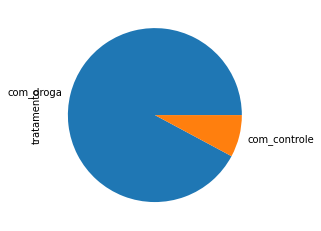

In [14]:
dados.tratamento.value_counts().plot.pie();

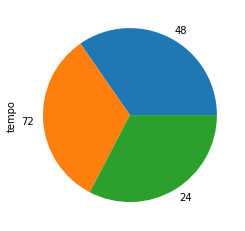

In [15]:
dados.tempo.value_counts().plot.pie();

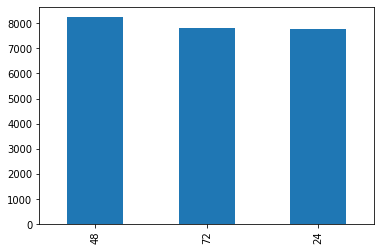

In [16]:
dados.tempo.value_counts().plot.bar();

In [17]:
dados_filtrados = dados[dados['g-0'] > 0]
dados_filtrados.head()

id tratamento  tempo dose  ...    c-96    c-97    c-98    c-99
0  id_000644bb2  com_droga     24   D1  ... -0.3981  0.2139  0.3801  0.4176
1  id_000779bfc  com_droga     72   D1  ...  0.1522  0.1241  0.6077  0.7371
2  id_000a6266a  com_droga     48   D1  ... -0.6417 -0.2187 -1.4080  0.6931
6  id_001bd861f  com_droga     24   D2  ...  2.4670  0.0357  0.1351 -0.3179
7  id_0020d0484  com_droga     48   D1  ...  0.6633  0.4562 -0.9622  0.0260

[5 rows x 877 columns]

#Desafios

##Desafio 01: Investigar por que a classe tratamento é tão desbalanceada.

In [28]:
print(dados.tratamento.value_counts(normalize=True))
print()
tratamento = dados.query('tratamento == "com_controle"')
print(tratamento.droga.value_counts())
#dados.droga.value_counts().sort_values(ascending=False)

com_droga       0.921643
com_controle    0.078357
Name: tratamento, dtype: float64

cacb2b860    1866
Name: droga, dtype: int64


A classe 'tratamento' é desbalanceada pois os testes são feitos em grande parte (cerca de 93%) utilizando drogas reais e não o placebo (cacb2b860).

##Desafio 02: Plotar as 5 últimas linhas da tabela.

In [49]:
dados.tail()

id    tratamento  tempo dose  ...    c-96    c-97    c-98    c-99
23809  id_fffb1ceed     com_droga     24   D2  ...  0.0631  0.9171  0.5258  0.4680
23810  id_fffb70c0c     com_droga     24   D2  ... -0.2084 -0.1224 -0.2715  0.3689
23811  id_fffc1c3f4  com_controle     48   D2  ...  0.2256  0.7592  0.6656  0.3808
23812  id_fffcb9e7c     com_droga     24   D1  ...  0.1732  0.7015 -0.6290  0.0740
23813  id_ffffdd77b     com_droga     72   D1  ... -3.5770 -0.4775 -2.1500 -4.2520

[5 rows x 877 columns]

##Desafio 03: Calcular a proporção das classes 'tratamento'.

In [29]:
calculo = dados.tratamento.value_counts(normalize=True) * 100

formatacao = '{tipotratamento} : {value:.2f}%'

print(formatacao.format(tipotratamento = "Com droga", value = calculo.com_droga))
print(formatacao.format(tipotratamento = "Com controle", value = calculo.com_controle))
print()

Com droga : 92.16%
Com controle : 7.84%



Aproximadamente 92% dos casos estudados foram utilizadas drogas. Inversamente proporcional a isso, quase 8% dos casos estudados foram mantidos sob controles gênicos.

##Desafio 04: Quantos tipos de drogas foram investigados.

In [32]:
print('Foram investigados', dados['droga'].nunique(), 'tipos de drogas.')

Foram investigados 3289 tipos de drogas.


Foram investigados 3289 tipos de drogas diferentes.

##Desafio 05: Procurar na documentação o método query (pandas).

In [44]:
df_colunas_renomeadas.query('g0 > 0')

id    tratamento  tempo dose  ...     c96     c97     c98     c99
0      id_000644bb2     com_droga     24   D1  ... -0.3981  0.2139  0.3801  0.4176
1      id_000779bfc     com_droga     72   D1  ...  0.1522  0.1241  0.6077  0.7371
2      id_000a6266a     com_droga     48   D1  ... -0.6417 -0.2187 -1.4080  0.6931
6      id_001bd861f     com_droga     24   D2  ...  2.4670  0.0357  0.1351 -0.3179
7      id_0020d0484     com_droga     48   D1  ...  0.6633  0.4562 -0.9622  0.0260
...             ...           ...    ...  ...  ...     ...     ...     ...     ...
23807  id_fff7e6992     com_droga     48   D1  ...  0.3738  0.8636  0.4494  0.1218
23808  id_fff8c2444     com_droga     72   D1  ... -0.7415  0.8413 -0.4259  0.2434
23809  id_fffb1ceed     com_droga     24   D2  ...  0.0631  0.9171  0.5258  0.4680
23811  id_fffc1c3f4  com_controle     48   D2  ...  0.2256  0.7592  0.6656  0.3808
23812  id_fffcb9e7c     com_droga     24   D1  ...  0.1732  0.7015 -0.6290  0.0740

[11769 rows x 877 columns]

Documentação do Pandas: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.query.html?highlight=query#pandas.DataFrame.query

##Desafio 06: Renomear as colunas tirando o hífen.

In [33]:
df_colunas_renomeadas = dados.copy()
df_colunas_renomeadas.rename(columns=lambda x: x.replace('-', ''), inplace=True)
df_colunas_renomeadas

id    tratamento  tempo dose  ...     c96     c97     c98     c99
0      id_000644bb2     com_droga     24   D1  ... -0.3981  0.2139  0.3801  0.4176
1      id_000779bfc     com_droga     72   D1  ...  0.1522  0.1241  0.6077  0.7371
2      id_000a6266a     com_droga     48   D1  ... -0.6417 -0.2187 -1.4080  0.6931
3      id_0015fd391     com_droga     48   D1  ... -1.6210 -0.8784 -0.3876 -0.8154
4      id_001626bd3     com_droga     72   D2  ...  0.1094  0.2885 -0.3786  0.7125
...             ...           ...    ...  ...  ...     ...     ...     ...     ...
23809  id_fffb1ceed     com_droga     24   D2  ...  0.0631  0.9171  0.5258  0.4680
23810  id_fffb70c0c     com_droga     24   D2  ... -0.2084 -0.1224 -0.2715  0.3689
23811  id_fffc1c3f4  com_controle     48   D2  ...  0.2256  0.7592  0.6656  0.3808
23812  id_fffcb9e7c     com_droga     24   D1  ...  0.1732  0.7015 -0.6290  0.0740
23813  id_ffffdd77b     com_droga     72   D1  ... -3.5770 -0.4775 -2.1500 -4.2520

[23814 rows x 877 columns]

##Desafio 07: Deixar os gráficos bonitos.

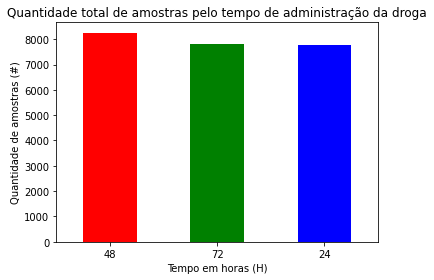

In [39]:
import matplotlib.pyplot as plt

dados['tempo'].value_counts().plot.bar(title = "Quantidade total de amostras pelo tempo de administração da droga", 
                                       xlabel = "Tempo em horas (H)", 
                                       ylabel = "Quantidade de amostras (#)" , 
                                       color = ["red", "green", "blue"],
                                       rot='horizontal'
                                       )
             
plt.tight_layout()

##Desafio 08: Resumo do que você aprendeu com os dados.

1.   É possível importar um arquivo com a extensão ".zip" a partir do parâmetro "compression" da função "read_csv" do pandas;

2.   Observamos que existem: 
      a. 2 tipos de tratamento para o cenário analisado: "com_droga" e "com_controle". Sendo que "com_droga" diz respeito a substância utilizada no experimento e "com_controle" diz respeito a possivelmente o placebo utilziado no experimento "cacb2b860";

3.   Houveram somente três tempos de análise: 24, 48 e 72h;

4.   Fora aplicadas duas doses: "D1" e "D2"; 

5.   Foram analisadas 3289 drogas no experimento.